<a href="https://colab.research.google.com/github/kangand/1000ml/blob/master/Assignment_7/Draft_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Testing image classification at a basic level with smaller image dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.facecolor']='w'
plt.rcParams['figure.edgecolor']='w'

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import os

import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/Drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/Drive


In [71]:
import torch

from fastai.vision import get_transforms
from fastai.vision.data import ImageList
from fastai.vision import defaults
from fastai.metrics import error_rate, accuracy
from fastai.vision.learner import create_cnn, cnn_learner
from fastai.vision.models import resnet34, vgg16_bn
from fastai.widgets import *

In [5]:
path = '/content/Drive/My Drive/jewelery_images'
splits = ['train', 'valid', 'test']
classes = ['bracelet', 'earrings', 'necklace', 'ring']

for i in splits:
  for j in classes:
    print(os.path.join(path,i,j))
    if not os.path.exists(os.path.join(path,i,j)):
      os.makedirs(os.path.join(path,i,j))

/content/Drive/My Drive/jewelery_images/train/bracelet
/content/Drive/My Drive/jewelery_images/train/earrings
/content/Drive/My Drive/jewelery_images/train/necklace
/content/Drive/My Drive/jewelery_images/train/ring
/content/Drive/My Drive/jewelery_images/valid/bracelet
/content/Drive/My Drive/jewelery_images/valid/earrings
/content/Drive/My Drive/jewelery_images/valid/necklace
/content/Drive/My Drive/jewelery_images/valid/ring
/content/Drive/My Drive/jewelery_images/test/bracelet
/content/Drive/My Drive/jewelery_images/test/earrings
/content/Drive/My Drive/jewelery_images/test/necklace
/content/Drive/My Drive/jewelery_images/test/ring


In [6]:
tfms = get_transforms(do_flip=False)

In [7]:
data = (ImageList.from_folder(path)
  .split_by_rand_pct()
  .label_from_folder()
  .transform(tfms,size=64)
  .databunch())

In [8]:
data.batch_size

64

In [68]:
learn = create_cnn(data, resnet34, metrics=accuracy)

In [69]:
defaults.device = torch.device('cuda')

In [70]:
learn.fit_one_cycle(4)

%time

epoch,train_loss,valid_loss,accuracy,time
0,2.066460,1.061764,0.543307,00:35
1,1.536928,0.856536,0.685039,00:35
2,1.234206,0.879097,0.708661,00:33
3,1.030837,0.765125,0.779528,00:34


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 12.9 µs


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


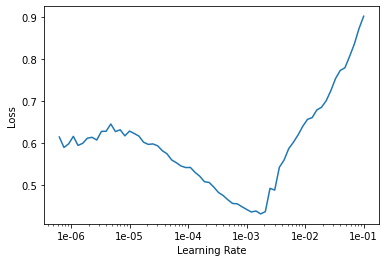

In [12]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [14]:
df = pd.read_csv(os.path.join(path, 'cleaned.csv'), header='infer')
df.head()

,name,label
0,valid/ring/image9.jpeg,ring
1,valid/ring/image0.jpeg,ring
2,valid/ring/image5.jpeg,ring
3,valid/ring/image6.jpeg,ring
4,valid/ring/image.jpeg,ring


In [15]:
interp = ClassificationInterpretation.from_learner(learn)

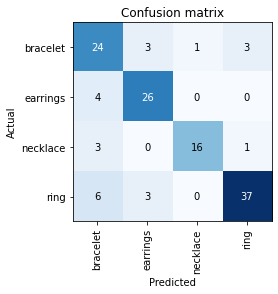

In [16]:
interp.plot_confusion_matrix()

In [73]:
# cnn with other models

learn2 = create_cnn(data, vgg16_bn, metrics=accuracy)

In [74]:
learn2.fit_one_cycle(4)

%time

epoch,train_loss,valid_loss,accuracy,time
0,2.168357,0.962751,0.598425,01:10
1,1.484199,0.676659,0.732283,01:09
2,1.136033,0.548316,0.834646,01:10
3,0.941395,0.513484,0.858268,01:09


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs


In [75]:
interp2 = ClassificationInterpretation.from_learner(learn2)

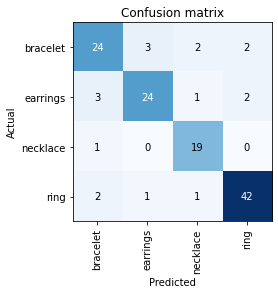

In [76]:
interp2.plot_confusion_matrix()

In [18]:
import tensorflow as tf

Resetnet50

In [19]:
from keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
test_datagen = ImageDataGenerator()
                                 
train_generator = train_datagen.flow_from_directory(
    directory=(path+"/train"),
    target_size=(224, 224),
    batch_size=64,
    class_mode="categorical",
)
valid_generator = train_datagen.flow_from_directory(
    directory=(path+"/valid"),
    target_size=(224, 224),
    batch_size=64,
    class_mode="categorical",
    
)
test_generator = test_datagen.flow_from_directory(
    directory=(path+"/test"),
    target_size=(224, 224),
    batch_size=1,
    class_mode=None
)



filenames = test_generator.filenames
nb_samples = len(filenames)




Using TensorFlow backend.


Found 415 images belonging to 4 classes.
Found 120 images belonging to 4 classes.
Found 100 images belonging to 4 classes.


In [20]:
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
#from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
from tensorflow.keras.layers import Dense, Activation, Flatten,GlobalAveragePooling2D,Dropout
from tensorflow.keras.layers import  Input
from tensorflow.keras.models import  Model,Sequential
from tensorflow.python.keras import optimizers

In [21]:
image_input = Input(shape=(224, 224, 3))
Restnet50 = Sequential()
Restnet50.add(ResNet50(include_top=False, pooling='avg', weights='imagenet'))
Restnet50.add(Dense(50, activation='relu'))
Restnet50.add(Dense(4, activation='softmax'))
Restnet50.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])


# Say not to train first layer (ResNet) model. It is already trained
Restnet50.layers[0].trainable = False
Restnet50.summary()

94773248/94765736 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dense (Dense)                (None, 50)                102450    
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 204       
Total params: 23,690,366
Trainable params: 102,654
Non-trainable params: 23,587,712
_________________________________________________________________


In [22]:
Restnet50.fit_generator(generator=train_generator,
                    verbose=1,
                    epochs=4,
                    validation_data=valid_generator)

%time

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/4
7/7 [==============================] - 258s 37s/step - loss: 0.9276 - accuracy: 0.6988 - val_loss: 182.8060 - val_accuracy: 0.2000
Epoch 2/4
7/7 [==============================] - 260s 37s/step - loss: 0.4811 - accuracy: 0.8458 - val_loss: 493.1225 - val_accuracy: 0.1833
Epoch 3/4
7/7 [==============================] - 259s 37s/step - loss: 0.4195 - accuracy: 0.8723 - val_loss: 428.1978 - val_accuracy: 0.1833
Epoch 4/4
7/7 [==============================] - 261s 37s/step - loss: 0.4275 - accuracy: 0.8723 - val_loss: 9.9565 - val_accuracy: 0.3000


In [23]:
# xception

from tensorflow.keras.applications.xception import Xception

In [49]:

Xception=Sequential()
Xception.add(tf.keras.applications.Xception(include_top=False, pooling='avg', weights='imagenet'))
Xception.add(Dense(50, activation='relu'))
Xception.add(Dense(4, activation='softmax'))
Xception.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

Xception.layers[0].trainable = False
Xception.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Model)             (None, 2048)              20861480  
_________________________________________________________________
dense_8 (Dense)              (None, 50)                102450    
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 204       
Total params: 20,964,134
Trainable params: 102,654
Non-trainable params: 20,861,480
_________________________________________________________________


In [50]:
Xception.fit_generator(generator=train_generator,
                    verbose=1,
                    epochs=4,
                    validation_data=valid_generator)

%time

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs
Epoch 1/4
7/7 [==============================] - 340s 49s/step - loss: 0.7111 - accuracy: 0.7205 - val_loss: 0.5161 - val_accuracy: 0.8500
Epoch 2/4
7/7 [==============================] - 332s 47s/step - loss: 0.1620 - accuracy: 0.9470 - val_loss: 1.5251 - val_accuracy: 0.8167
Epoch 3/4
7/7 [==============================] - 325s 46s/step - loss: 0.1969 - accuracy: 0.9422 - val_loss: 0.9218 - val_accuracy: 0.8500
Epoch 4/4
7/7 [==============================] - 323s 46s/step - loss: 0.1677 - accuracy: 0.9542 - val_loss: 5.6105 - val_accuracy: 0.5333


In [51]:
DenseNet121=Sequential()
DenseNet121.add(tf.keras.applications.DenseNet121(include_top=False, pooling='avg', weights='imagenet'))
DenseNet121.add(Dense(50, activation='relu'))
DenseNet121.add(Dense(4, activation='softmax'))
DenseNet121.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

DenseNet121.layers[0].trainable = False
DenseNet121.summary()

29089792/29084464 [==============================] - 0s 0us/step
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Model)          (None, 1024)              7037504   
_________________________________________________________________
dense_10 (Dense)             (None, 50)                51250     
_________________________________________________________________
dense_11 (Dense)             (None, 4)                 204       
Total params: 7,088,958
Trainable params: 51,454
Non-trainable params: 7,037,504
_________________________________________________________________


In [52]:
DenseNet121.fit_generator(generator=train_generator,
                    verbose=1,
                    epochs=4,
                    validation_data=valid_generator)

%time

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.82 µs
Epoch 1/4
7/7 [==============================] - 279s 40s/step - loss: 0.8254 - accuracy: 0.6723 - val_loss: 1.5652 - val_accuracy: 0.3917
Epoch 2/4
7/7 [==============================] - 280s 40s/step - loss: 0.2298 - accuracy: 0.9084 - val_loss: 13.2952 - val_accuracy: 0.2167
Epoch 3/4
7/7 [==============================] - 277s 40s/step - loss: 0.2168 - accuracy: 0.9133 - val_loss: 2.4025 - val_accuracy: 0.3750
Epoch 4/4
7/7 [==============================] - 277s 40s/step - loss: 0.1890 - accuracy: 0.9349 - val_loss: 5.1526 - val_accuracy: 0.4167


# Conclusion

Xception is the best model in terms of predictive accuracy.
VGG16 is the better CNN.